<h1> Neural Network </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization


In [6]:
data = pd.read_csv('final_data.csv')

In [20]:
x = data.drop('activity_id', axis=1)
y = data['activity_id']

In [22]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_cat = to_categorical(y,num_classes=12)

In [24]:
x_dev, x_test, y_dev, y_test = train_test_split(x, y_cat, test_size=0.3, random_state=42,stratify=y)

In [25]:
y_dev_stratify = np.argmax(y_dev, axis=1)
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size=0.3, random_state=42,stratify=y_dev_stratify)

In [26]:
batch_size = [32,64]
batch_size_adam_models = []
batch_size_adam_accuracy = []
batch_size_adam_history = []

batch_size_sgd_models = []
batch_size_sgd_accuracy = []
batch_size_sgd_history = []

In [ ]:
for batch in batch_size:
 model_normal = Sequential()
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(64, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(12, activation='softmax'))
 model_normal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 model = model_normal.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=10, batch_size=batch)
 batch_size_adam_models.append(model_normal)
 batch_size_adam_accuracy.append(model.history['val_accuracy'][-1])
 batch_size_adam_history.append(model)

In [ ]:
for batch in batch_size:
 model_normal = Sequential()
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(32, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(64, activation='relu'))
 model_normal.add(BatchNormalization())
 model_normal.add(Dense(12, activation='softmax'))
 model_normal.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
 model = model_normal.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=10, batch_size=batch)
 batch_size_sgd_models.append(model_normal)
 batch_size_sgd_accuracy.append(model.history['val_accuracy'][-1])
 batch_size_sgd_history.append(model)

In [29]:
adam_index = np.argmax(batch_size_adam_accuracy)
best_adam_model = batch_size_adam_models[adam_index]
sgd_index = np.argmax(batch_size_sgd_accuracy)
best_sgd_model = batch_size_sgd_models[sgd_index]

if batch_size_adam_accuracy[adam_index] > batch_size_sgd_accuracy[sgd_index]:
  best_model = best_adam_model
else:
  best_model = best_sgd_model

In [30]:
best_model

<Sequential name=sequential_2, built=True>

18215/18215 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step
Test Set Accuracy of the best model is : 0.9931

Confusion Matrix:



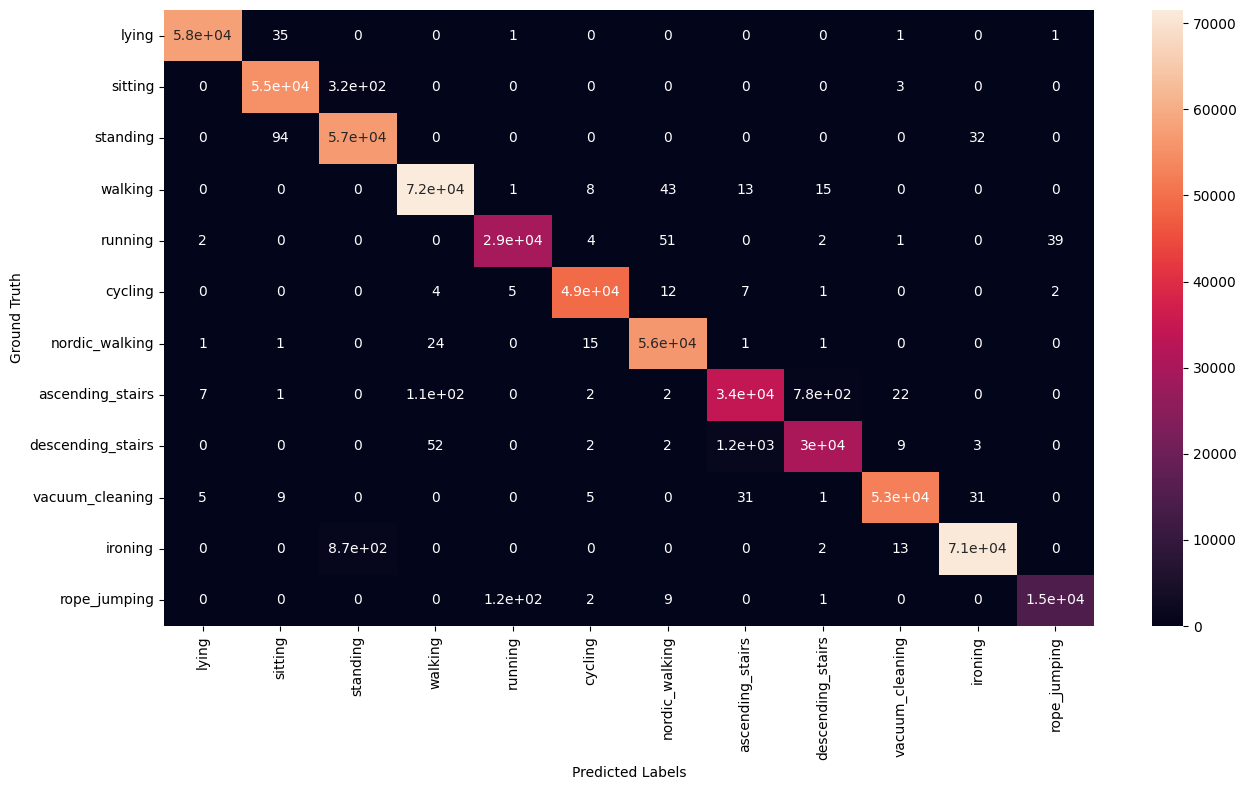


Classification Report:

              precision    recall  f1-score   support

           0     0.9997    0.9993    0.9995     57757
           1     0.9975    0.9941    0.9958     55557
           2     0.9793    0.9978    0.9885     56979
           3     0.9974    0.9989    0.9981     71628
           4     0.9957    0.9966    0.9961     29460
           5     0.9992    0.9994    0.9993     49380
           6     0.9979    0.9992    0.9986     56432
           7     0.9658    0.9738    0.9698     35165
           8     0.9742    0.9610    0.9675     31483
           9     0.9991    0.9984    0.9988     52606
          10     0.9991    0.9876    0.9933     71607
          11     0.9971    0.9910    0.9941     14808

    accuracy                         0.9931    582862
   macro avg     0.9918    0.9914    0.9916    582862
weighted avg     0.9932    0.9931    0.9931    582862



In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_test_pred_prob = best_model.predict(x_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_test_actual = np.argmax(y_test, axis=1)


accuracy = accuracy_score(y_test_actual, y_test_pred)
print(f"Test Set Accuracy of the best model is : {accuracy:.4f}")

activity_map = {0:'lying',1:'sitting',2:'standing',3:'walking',4:'running',5:'cycling',6:'nordic_walking',
                7:'ascending_stairs',8:'descending_stairs',9:'vacuum_cleaning',10:'ironing',11:'rope_jumping'}
cm = confusion_matrix(y_test_actual, y_test_pred)
print("\nConfusion Matrix:\n")
class_names = [activity_map[i] for i in range(len(activity_map))]
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Ground Truth')
plt.show()



print("\nClassification Report:\n")
print(classification_report(y_test_actual, y_test_pred,digits=4))
